# AKARI-NEP master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
33f5ec7 (Wed Dec 6 16:56:17 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix, quick_checks

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_akari-nep_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_akari-nep_20171211.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

Table shows only problematic columns.


idx,Column,All nan,#Measurements,#Zeros,#Negative,Minimum value
0,merr_ap_gpc1_r,False,221213,1,0,0.0
1,ferr_megacam_u,False,55145,605,0,0.0
2,merr_megacam_u,False,55145,605,0,0.0
3,ferr_megacam_g,False,75961,1605,0,0.0
4,merr_megacam_g,False,75961,1605,0,0.0
5,ferr_megacam_r,False,79454,1432,0,0.0
6,merr_megacam_r,False,79454,1432,0,0.0
7,ferr_megacam_i,False,83295,1097,0,0.0
8,merr_megacam_i,False,83295,1097,0,0.0
9,ferr_megacam_z,False,85797,788,0,0.0


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

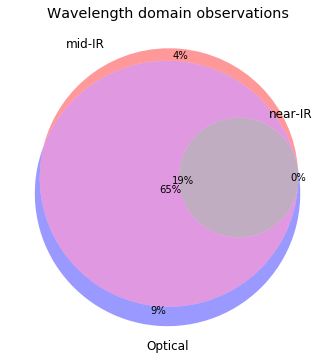

In [6]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

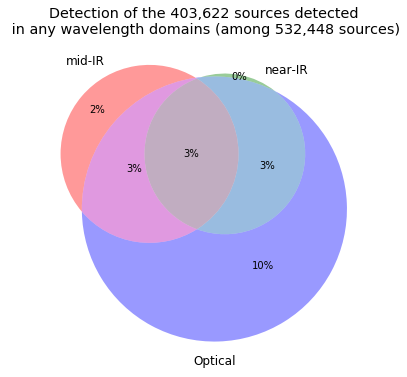

In [7]:

venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = ["Megacam u"]
g_bands = ["Megacam g", "GPC1 g"]
r_bands = ["Megacam r", "GPC1 r"]
i_bands = ["Megacam i", "GPC1 i"]
z_bands = ["Megacam z", "GPC1 z"]
y_bands = [             "GPC1 y", "Wircam y"]
j_bands = [                       "Wircam j"]
k_bands = [                       "Wircam k"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

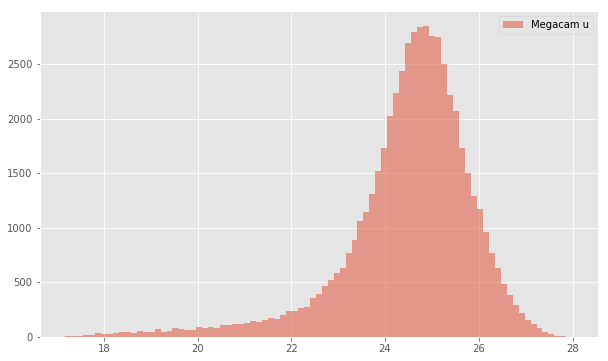

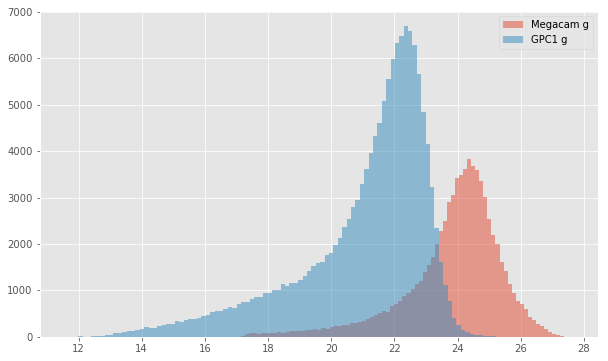

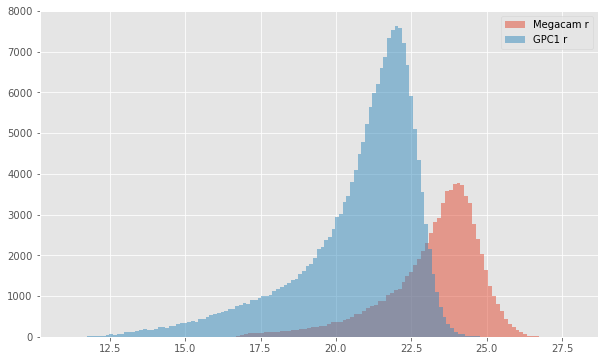

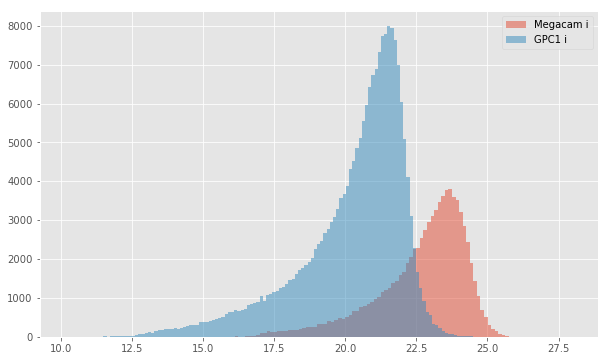

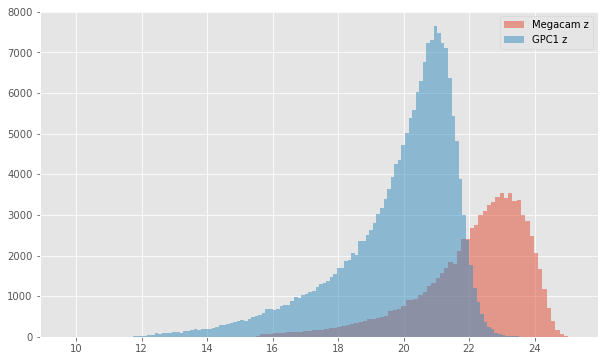

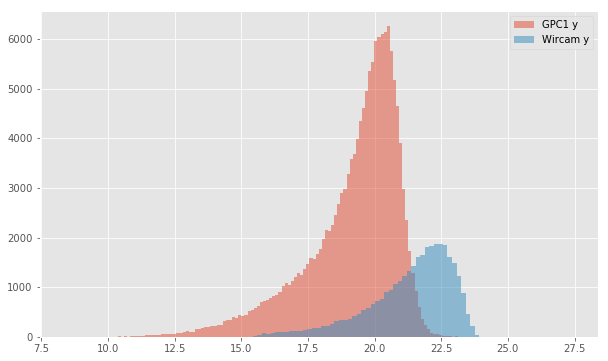

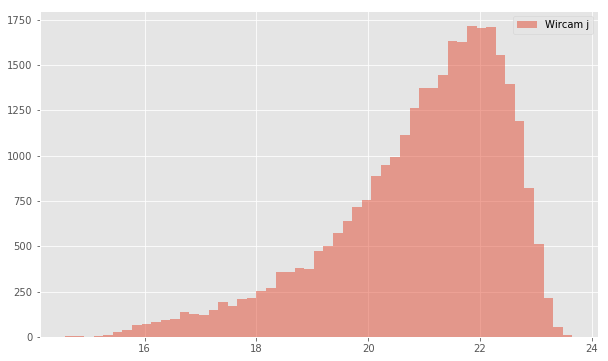

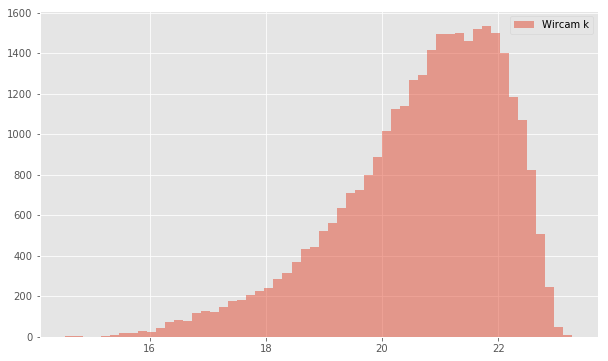

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands, j_bands, k_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

GPC1 g (total) - Megacam g (total):
- Median: 0.09
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1177866744995117
- 99% percentile: 0.9651809883117686


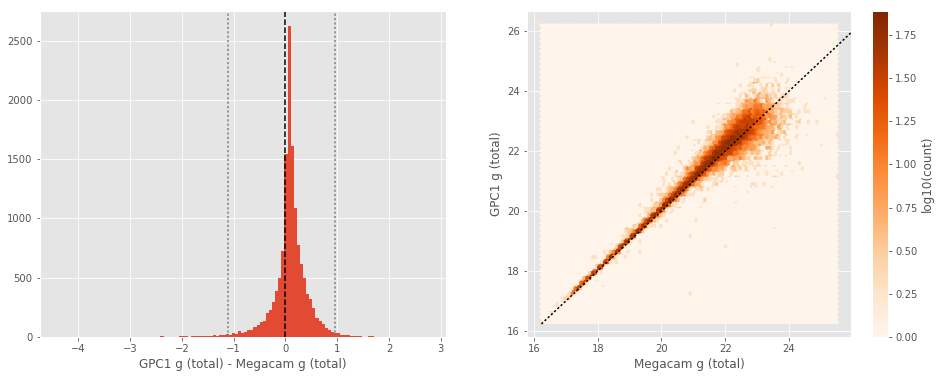

GPC1 r (total) - Megacam r (total):
- Median: 0.07
- Median Absolute Deviation: 0.09
- 1% percentile: -0.5968659400939942
- 99% percentile: 0.844063377380373


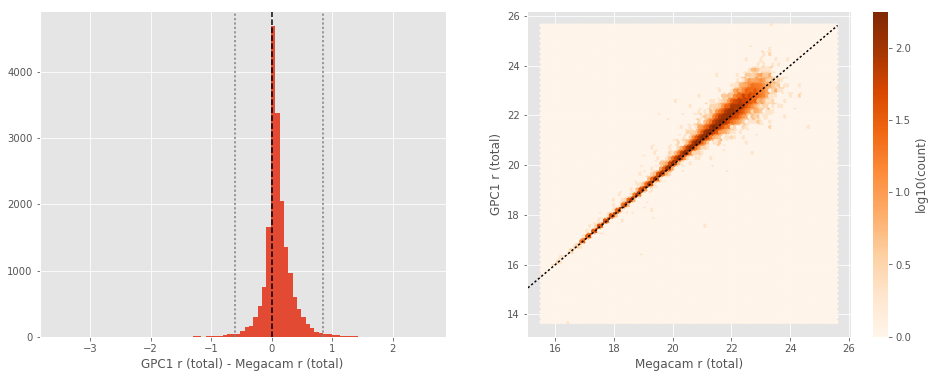

GPC1 i (total) - Megacam i (total):
- Median: 0.06
- Median Absolute Deviation: 0.07
- 1% percentile: -0.524024486541748
- 99% percentile: 0.6067495346069336


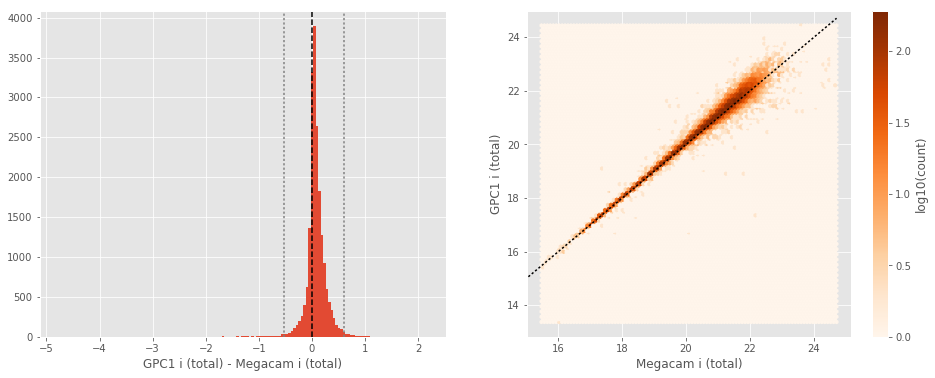

GPC1 z (total) - Megacam z (total):
- Median: 0.25
- Median Absolute Deviation: 0.09
- 1% percentile: -0.32895492553710937
- 99% percentile: 0.9741711425781265


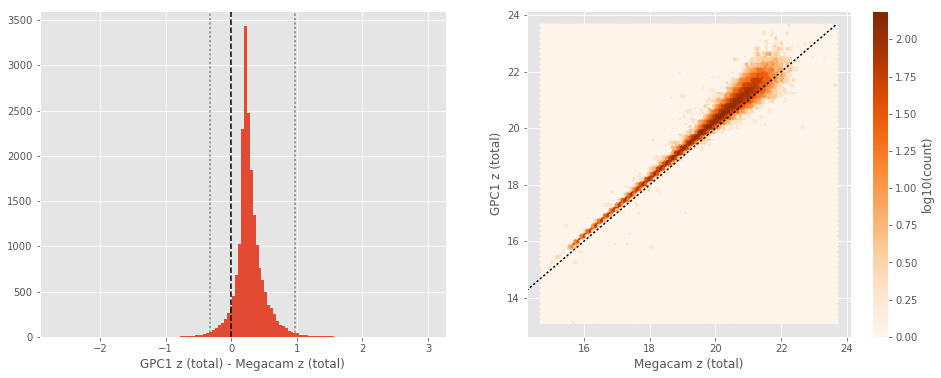

Wircam y (total) - GPC1 y (total):
- Median: -0.20
- Median Absolute Deviation: 0.14
- 1% percentile: -1.075844135284424
- 99% percentile: 0.7053063774108901


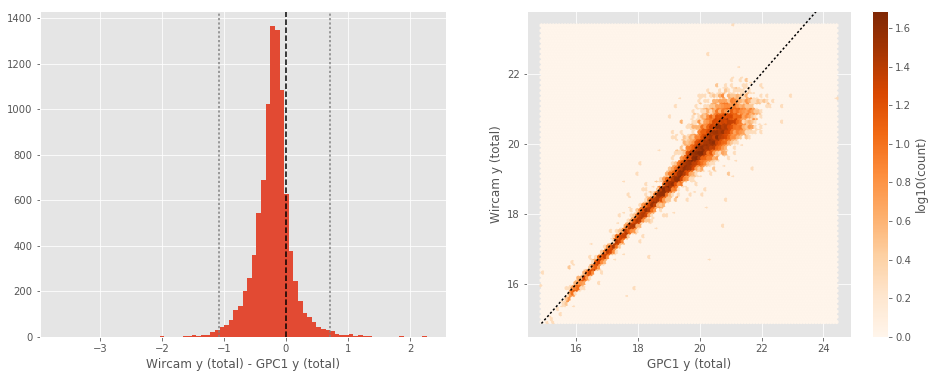

In [12]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        if 'megacam' not in col1 and 'megacam' not in col2 and 'wircam' not in col1 and 'wircam' not in col2:
            col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
            nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [13]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [14]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_AKARI-NEP.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

No sources have both SDSS u (petroMag) and Megacam u (total) values.
No sources have both SDSS g (petroMag) and Megacam g (total) values.
GPC1 g (total) - SDSS g (petroMag):
- Median: -0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -2.4332740783691404
- 99% percentile: 0.9568391799926749


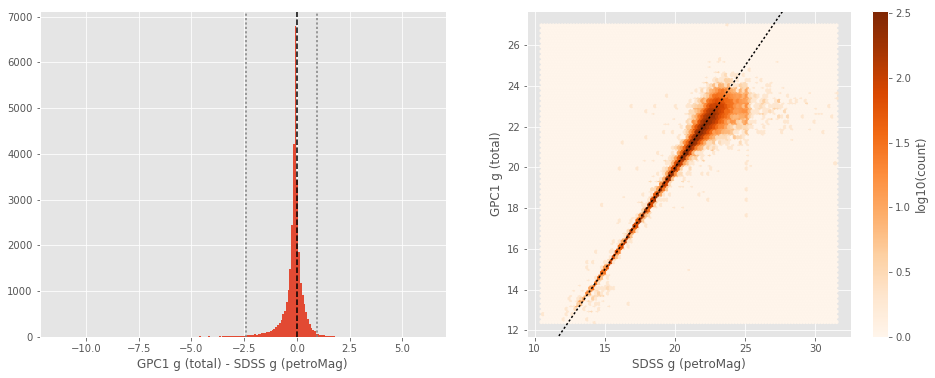

No sources have both SDSS r (petroMag) and Megacam r (total) values.
GPC1 r (total) - SDSS r (petroMag):
- Median: 0.03
- Median Absolute Deviation: 0.09
- 1% percentile: -1.8082289123535156
- 99% percentile: 0.9545101165771432


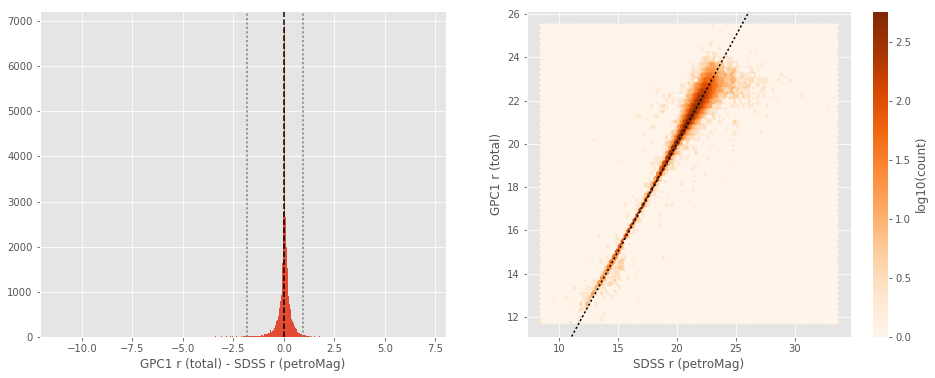

No sources have both SDSS i (petroMag) and Megacam i (total) values.
GPC1 i (total) - SDSS i (petroMag):
- Median: 0.03
- Median Absolute Deviation: 0.08
- 1% percentile: -2.3104727554321287
- 99% percentile: 0.738287467956543


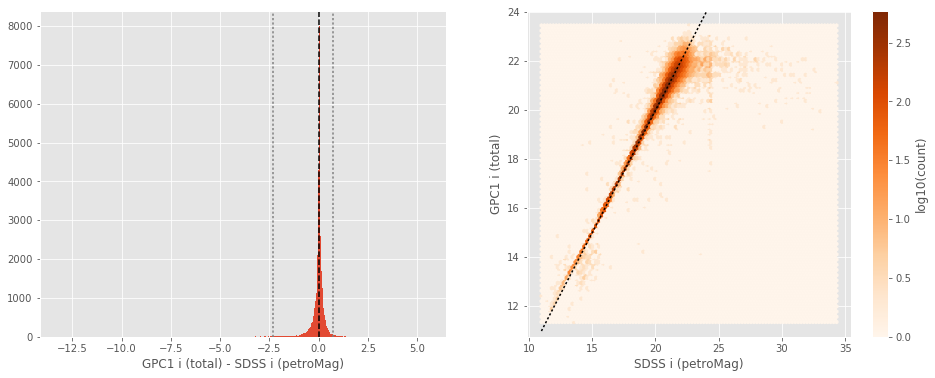

No sources have both SDSS z (petroMag) and Megacam z (total) values.
GPC1 z (total) - SDSS z (petroMag):
- Median: 0.10
- Median Absolute Deviation: 0.16
- 1% percentile: -3.0038655090332034
- 99% percentile: 1.4121164131164508


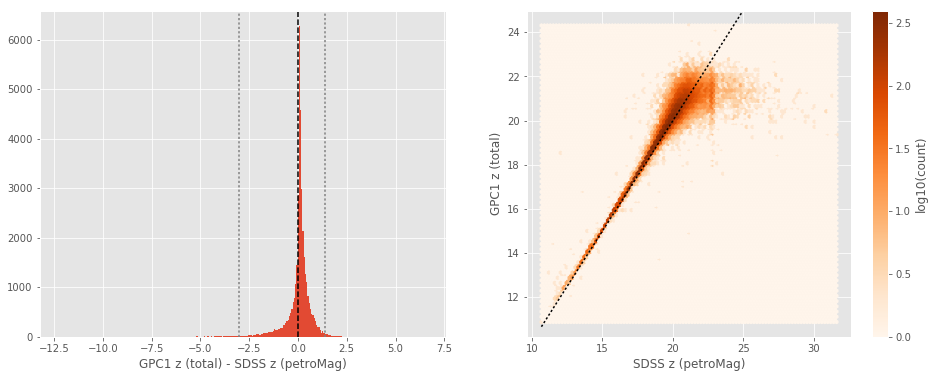

In [17]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        if 'megacam' not in col1 and 'megacam' not in col2 and 'wircam' not in col1 and 'wircam' not in col2:
            sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
            master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
            nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [18]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [19]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_AKARI-NEP.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

WIRCAM J (total) - 2MASS J:
- Median: 0.03
- Median Absolute Deviation: 0.07
- 1% percentile: -0.928474068441564
- 99% percentile: 0.3543059425447635


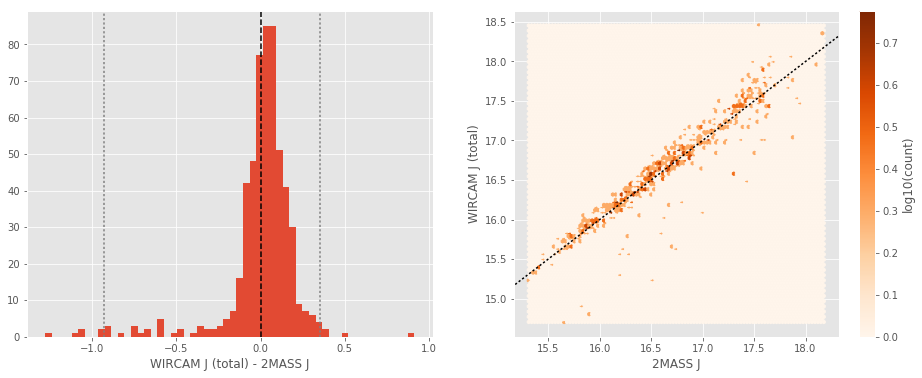

In [20]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_wircam_j'][ml_twomass_idx],
                labels=("2MASS J", "WIRCAM J (total)"))

WIRCAM Ks-like (total) - 2MASS Ks:
- Median: 0.08
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8233416467150252
- 99% percentile: 0.9889085999433009


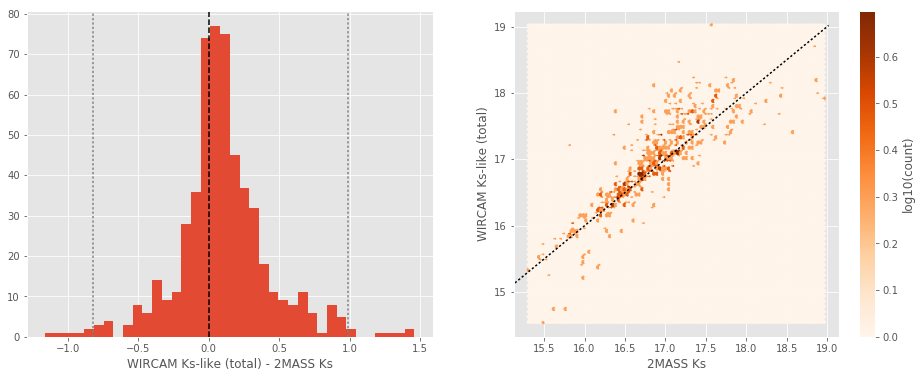

In [21]:
ukidss_ks_like = master_catalogue['m_wircam_k'] + 0.003 + 0.004 * (
    master_catalogue['m_wircam_j'] - master_catalogue['m_wircam_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "WIRCAM Ks-like (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [22]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 109278 / 532448 (20.52%)


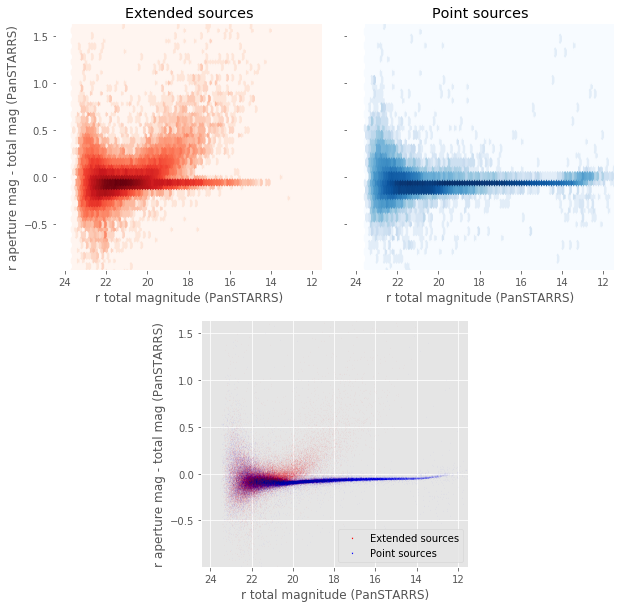

In [23]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (PanSTARRS)", "r aperture mag - total mag (PanSTARRS)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 25036 / 532448 (4.70%)


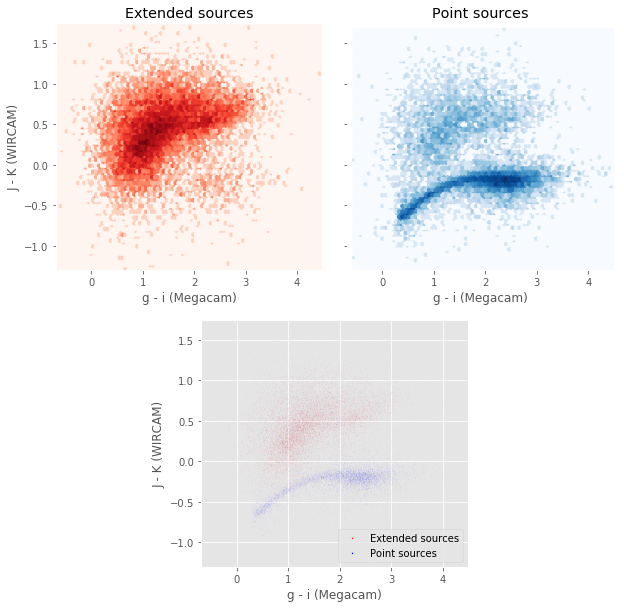

In [24]:
nb_ccplots(
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_i'],
    master_catalogue['m_wircam_j'] - master_catalogue['m_wircam_k'],
    "g - i (Megacam)", "J - K (WIRCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 14029 / 532448 (2.63%)


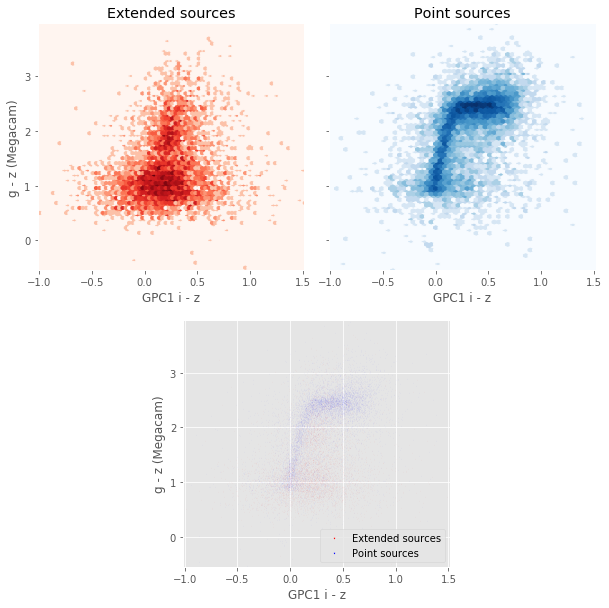

In [25]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_gpc1_z'],
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    "GPC1 i - z", "g - z (Megacam)",
    master_catalogue["stellarity"]
)

Number of source used: 52325 / 532448 (9.83%)


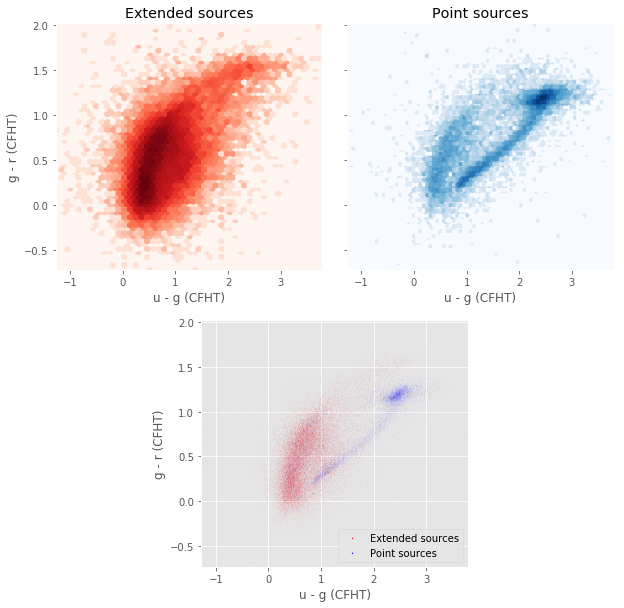

In [26]:
nb_ccplots(
    master_catalogue['m_megacam_u'] - master_catalogue['m_megacam_g'],
    master_catalogue['m_megacam_g'] - master_catalogue['m_megacam_r'],
    "u - g (CFHT)", "g - r (CFHT)",
    master_catalogue["stellarity"]
)

Number of source used: 7998 / 532448 (1.50%)


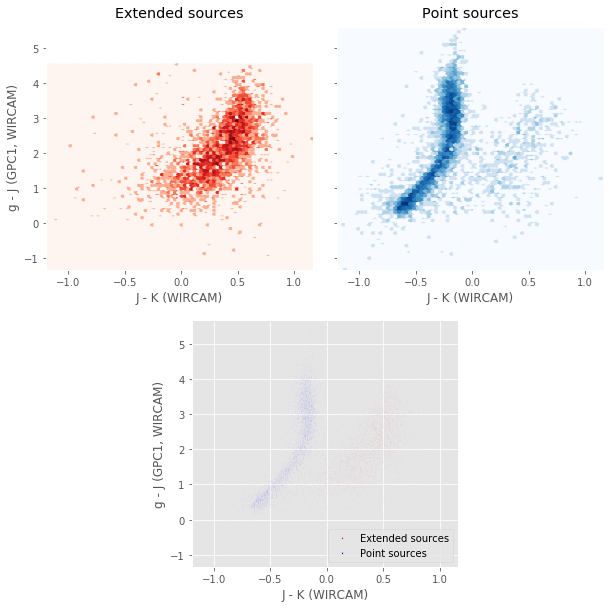

In [27]:
nb_ccplots(
    master_catalogue['m_wircam_j'] - master_catalogue['m_wircam_k'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_wircam_j'],
    "J - K (WIRCAM)", "g - J (GPC1, WIRCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 11395 / 532448 (2.14%)


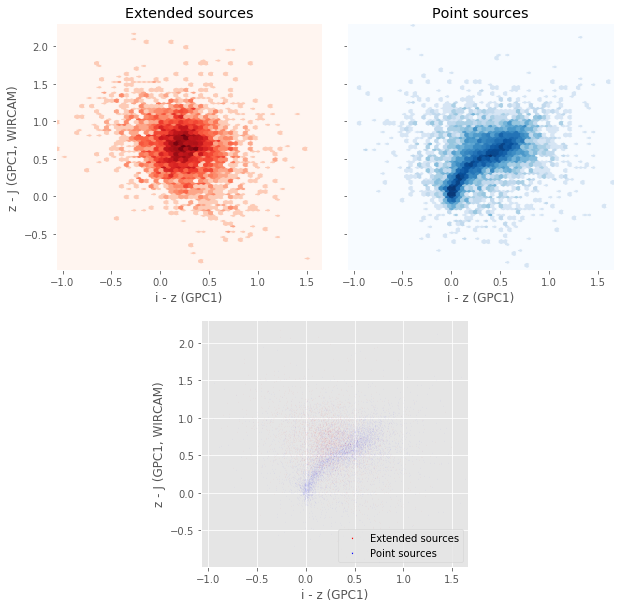

In [28]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_gpc1_z'],
    master_catalogue['m_gpc1_z'] - master_catalogue['m_wircam_j'],
    "i - z (GPC1)", "z - J (GPC1, WIRCAM)",
    master_catalogue["stellarity"]
)

Number of source used: 70158 / 532448 (13.18%)


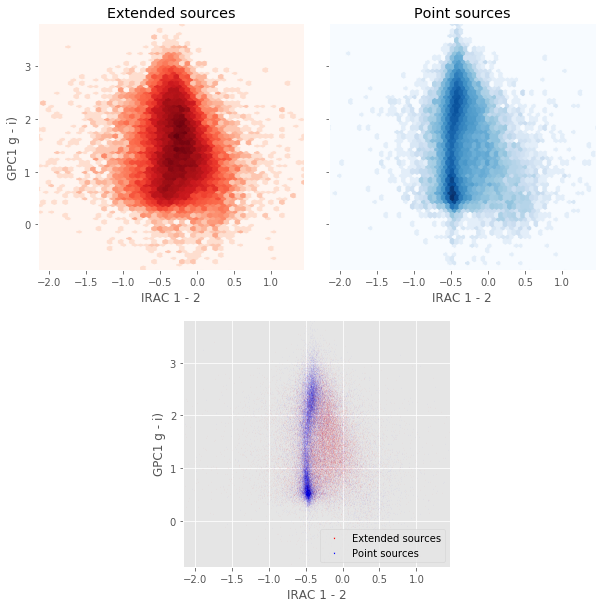

In [29]:
nb_ccplots(
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    "IRAC 1 - 2", "GPC1 g - i)",
    master_catalogue["stellarity"]
)